
# LLP109: Digital Application Development 
# `Lecture 7 - Python Practice (Regression)`



## Linear Regression

Topics we will cover are:

- Simple Linear Regression
- Multiple Linear regression
- Logistic Regression 

In [47]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# We start by importing the boston house prices dataset
from sklearn.datasets import load_boston

In [8]:

boston = load_boston()
print(boston.data.shape)

(506, 13)


In [10]:
boston.data


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [12]:
# The description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Question 1: Perform EDA on this dataset! 

- We want you to think about how to analyse this dataset
- Explore all variables
- Think of interesting questions (write them down in text using markdown before attempting to code some solution)
- Can you do any hypothesis testing on this data ? If so, think about it and write some code ?


In [ ]:
# Your code here!

In [13]:
prices = pd.DataFrame(boston.data)

In [15]:
prices.shape

(506, 13)

### Simple Linear Regression

- We use 1 variable to predict a quantitative variable.
- Remember: we want to find out relationship $y = f(x) + \epsilon$
- We assume that the relationship is linear i.e. it follows a the equation of a line.
- y = ax + b
- We use least squares approach to find the coefficients. 
- DOne using LinearRegression module in sklearn

## Let us start with one variable in the dataset

- For simplicity, I chose variable 0, CRIM
- Let us plot this

<AxesSubplot:xlabel='CRIM', ylabel='price'>

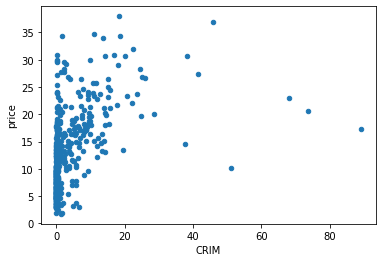

In [21]:
prices.plot(0, 12, kind='scatter', xlabel='CRIM', ylabel='price')


In [25]:
prices_var0 = prices[[0, 12]]


# I split the dataset for training and testing

- 200 rows for trainig
- remaining for testing

In [27]:
prices_var0_training = prices_var0[:200]
prices_var0_testing = prices_var0[200:]


In [45]:
# Creating a simple linear regression model

simlinreg = LinearRegression()
X = prices_var0_training[[0]].values.reshape(200, 1)
y = prices_var0_training[[12]].values.reshape(200,1)

# fir the model
simlinreg.fit(X, y)

# evaluate model
X_test = prices_var0_testing[[0]].values.reshape(306, 1)
y_test = prices_var0_testing[[12]].values.reshape(306, 1)


predictions = simlinreg.predict(X_test)


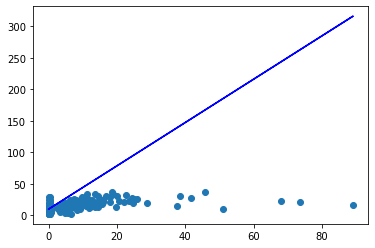

In [48]:
plt.scatter(prices_var0_testing[[0]], prices_var0_testing[[12]])
plt.plot(prices_var0_testing[[0]], predictions, color='blue')

In [49]:
prices.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [50]:
simlinreg.score(X_test, y_test)

-22.898573728812313

### We can see that this is not a very good model!

- Can you plot the other 11 variables vs the target and see if any appears to have a linear relationship ?
- If so, try to create a simple linear model with that variable


In [ ]:
# Plot the other variables vs Price!

In [ ]:
# Create Simple linear regression model with some variables where relationship seems linear

### Multiple Regression

- Extension of the simple model to include more than 1 variable
- $y = a_0 + a_1x_1 + a_2x_2 + \cdots + a_nx_n$
- We use LinearRegression from sklearn
- Let us just use all variables!

In [51]:
prices_varall = prices.copy(deep=True)
prices_varall_training = prices_varall[0:200]
prices_varall_testing = prices_varall[200:]

In [53]:
# We create the Linear regression model

linreg = LinearRegression()
X_1 = prices_varall_training[[0,1,2,3,4,5,6,7,8,9,10,11]].values.reshape(200, 12)
y_1 = prices_varall_training[[12]].values.reshape(200,1)

# fir the model
linreg.fit(X_1, y_1)

# evaluate model
X_1_test = prices_varall_testing[[0,1,2,3,4,5,6,7,8,9,10,11]].values.reshape(306, 12)
y_1_test = prices_varall_testing[[12]].values.reshape(306, 1)


predictions_all = linreg.predict(X_1_test)

In [54]:
linreg.score(X_1_test, y_1_test)

-0.08259005801630859

## It appears that the model has improved from before but still the score is pretty poor!


## Challenge

Here is a dataset from UCI machine learning lab

https://gitlab.com/deeprd/sdpa/-/raw/main/household_power_consumption.txt

The goal is to predict power consumption based on the input variables. 

More details about this dataset can be found here - https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

1. Download the data
2. Perform Exploratory data analysis (HINT: You might need to clean the data!!!)
3. USe simple linear Regression to predict power consumption
4. USe multiple regression to predict power consumption
5. There are some missing data values in some columns. Using only the input columns, try to fill the missing values in the columns using linear regression. (Do this one column at a time). Do not use the target column.